<a href="https://colab.research.google.com/github/akheel143/Fruits-classification/blob/main/fruits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_datasets'

In [3]:
%cd /content/drive/MyDrive/kaggle_datasets

/content/drive/MyDrive/kaggle_datasets


In [4]:
!ls

Apple	Carambola  Kiwi   muskmelon  Peach  Persimmon  Plum	    Tomatoes
Banana	Guava	   Mango  Orange     Pear   Pitaya     Pomegranate


In [ ]:
!kaggle datasets download -d chrisfilo/fruit-recognition

In [7]:
!unzip fruit-recognition.zip

unzip:  cannot find or open fruit-recognition.zip, fruit-recognition.zip.zip or fruit-recognition.zip.ZIP.


In [5]:
import os
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import *

In [4]:
data_directory = "/content/drive/MyDrive/kaggle_datasets"
data_pattern = os.path.sep.join([data_directory,"*/*.png"])
print(data_pattern)

/content/drive/MyDrive/kaggle_datasets/*/*.png


In [5]:
image_paths = list(glob.glob(data_pattern))

In [6]:
for i in range(5):
    print(image_paths[i])

/content/drive/MyDrive/kaggle_datasets/Banana/Banana02778.png
/content/drive/MyDrive/kaggle_datasets/Banana/Banana02815.png
/content/drive/MyDrive/kaggle_datasets/Banana/Banana02763.png
/content/drive/MyDrive/kaggle_datasets/Banana/Banana02806.png
/content/drive/MyDrive/kaggle_datasets/Banana/Banana02779.png


In [7]:
scale_factor = 1.0 / 255.0
image_generator = ImageDataGenerator(rescale=scale_factor)

iterator = (image_generator.flow_from_directory(directory=data_directory, batch_size=20))

Found 68743 images belonging to 16 classes.


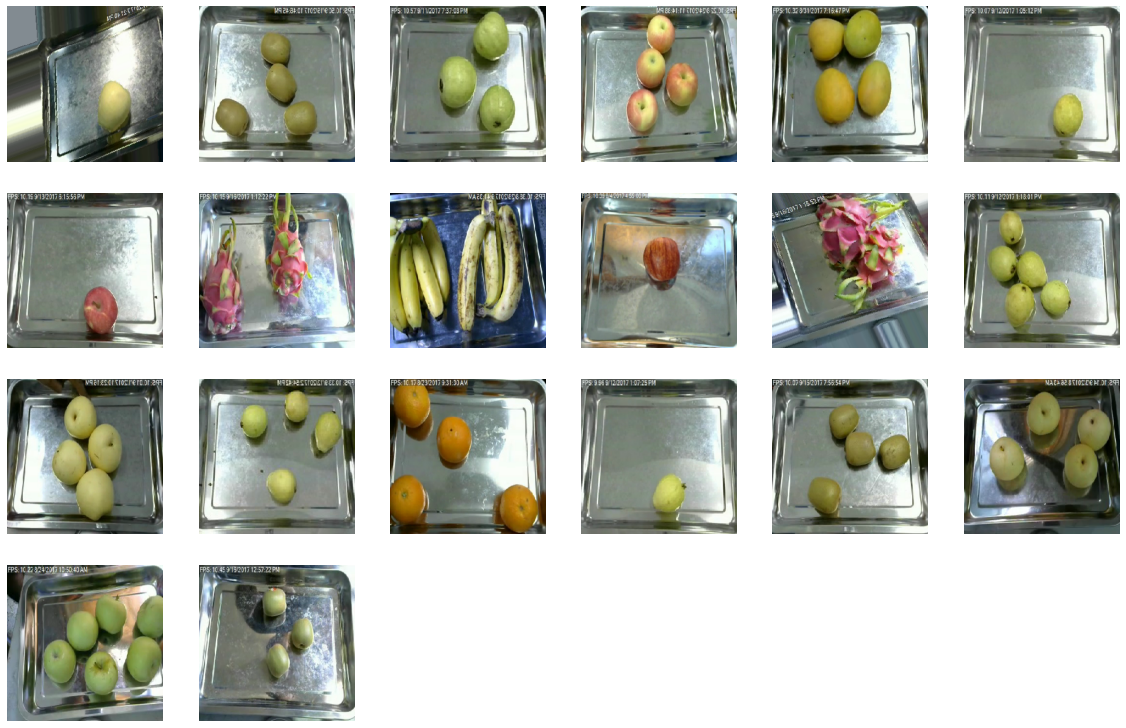

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.

In [8]:
# iterate through a single batch of images by using a for loop
for batch, labels in iterator:
    plt.figure(figsize=(20, 20))
    for index, image in enumerate(batch, start=1):
        ax = plt.subplot(6, 6, index)
        plt.imshow(image)
        plt.axis('off')
        
    plt.show()
    # print the label at the bottom to see what the label looks like for a single batch, as we can see it is one-hot encoded
    print(labels)
    # break so that it only iterates through a single batch and then the for loop is over
    break

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_gen=ImageDataGenerator()

In [7]:
train_batches =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
validation_split=0.7)

val_batch=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.3)

In [8]:
train_generator=train_batches.flow_from_directory('/content/drive/MyDrive/kaggle_datasets',
                                          target_size=(500,500),
                                          batch_size=15,
                                          class_mode='categorical',
                                          subset='training')

val_generator=train_batches.flow_from_directory('/content/drive/MyDrive/kaggle_datasets',
                                          target_size=(500,500),
                                          batch_size=15,
                                          class_mode='categorical',
                                          subset='validation')

Found 20631 images belonging to 15 classes.
Found 48112 images belonging to 15 classes.


In [9]:
class_indices = {}
for key in train_generator.class_indices.keys():
    class_indices[train_generator.class_indices[key]] = key
    
print(class_indices)

{0: 'Apple', 1: 'Banana', 2: 'Carambola', 3: 'Guava', 4: 'Kiwi', 5: 'Mango', 6: 'Orange', 7: 'Peach', 8: 'Pear', 9: 'Persimmon', 10: 'Pitaya', 11: 'Plum', 12: 'Pomegranate', 13: 'Tomatoes', 14: 'muskmelon'}


In [10]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout

In [11]:
model =Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(500,500,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 500, 500, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 250, 250, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1000000)           0         
_________________________________________________________________
dense (Dense)                (None, 64)                64000064  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
history = model.fit(x=train_generator,epochs=2)

Epoch 1/2
1376/1376 [==============================] - 1501s 1s/step - loss: 1.1776 - accuracy: 0.6694
Epoch 2/2
1376/1376 [==============================] - 211s 153ms/step - loss: 0.5505 - accuracy: 0.8048
